In [96]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50/NIFTY50.csv


In [97]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import datetime as dt
from datetime import datetime, timedelta
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [98]:
data = pd.read_csv("/kaggle/input/nifty50/NIFTY50.csv")
data

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,2.184224e+08
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,1.702674e+08
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,2.238044e+07
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,1.658768e+08
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,1.541349e+08
...,...,...,...,...,...,...
2127,2024-06-04,23179.50,23179.50,21884.50,21281.45,1.006105e+09
2128,2024-06-05,22128.35,22670.40,22620.35,21791.95,6.384871e+08
2129,2024-06-06,22798.60,22910.15,22821.40,22642.60,4.804133e+08
2130,2024-06-07,22821.85,23320.20,23290.15,22789.05,4.735549e+08


In [99]:
data['DATE']=pd.to_datetime(data['DATE']) 

In [100]:
data.isnull().sum()

DATE             0
OPEN             0
HIGH             0
CLOSE            0
LOW              0
SHARES_TRADED    1
dtype: int64

In [101]:
data.describe()

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
count,2132,2132.000000,2132.000000,2132.000000,2132.00000,2.131000e+03
mean,2020-02-28 16:26:06.979362304,13319.621693,13380.635436,13310.439587,13235.70530,3.454918e+08
min,2015-11-09 00:00:00,7023.650000,7034.200000,6970.600000,6825.80000,1.661087e+07
25%,2018-01-02 18:00:00,10086.887500,10131.175000,10086.300000,10035.00000,2.118395e+08
50%,2020-03-02 12:00:00,11635.850000,11682.100000,11604.525000,11566.10000,2.777027e+08
75%,2022-04-26 06:00:00,17331.812500,17408.125000,17325.812500,17216.31250,4.352246e+08
max,2024-06-10 00:00:00,23337.900000,23411.900000,23290.150000,23227.15000,1.811564e+09
std,NaN,4268.040653,4283.171457,4267.860134,4248.21664,1.969896e+08


In [102]:
data.dropna(inplace=True)

In [103]:
data

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,2.184224e+08
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,1.702674e+08
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,2.238044e+07
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,1.658768e+08
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,1.541349e+08
...,...,...,...,...,...,...
2127,2024-06-04,23179.50,23179.50,21884.50,21281.45,1.006105e+09
2128,2024-06-05,22128.35,22670.40,22620.35,21791.95,6.384871e+08
2129,2024-06-06,22798.60,22910.15,22821.40,22642.60,4.804133e+08
2130,2024-06-07,22821.85,23320.20,23290.15,22789.05,4.735549e+08


In [10]:
data.head()

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,218422388.0
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,170267413.0
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,22380435.0
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,165876819.0
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,154134885.0


In [11]:
fig = px.line(data, x='DATE',y=data.columns,title='NIFTY 50 Stock Price')
fig.show()

In [12]:
fig = px.line(data, x='DATE',y='OPEN',title='NIFTY 50 Stock Price')
fig.show()

In [13]:
fig = px.line(data, x='DATE',y='HIGH',title='NIFTY 50 Stock Price')
fig.show()

In [14]:
fig = px.line(data, x='DATE',y='LOW',title='NIFTY 50 Stock Price')
fig.show()

In [15]:
fig = px.line(data, x='DATE',y='CLOSE',title='NIFTY 50 Stock Price')
fig.show()

In [16]:
fig = px.line(data, x='DATE',y='SHARES_TRADED',title='NIFTY 50 Stock Price')
fig.show()

## Check Stationarity

In [17]:
def adf_test(df):
    for column in df.columns:
        print(f'Performing ADF test for column: {column}')
        result = adfuller(df[column])
        print("ADF statistics: {}".format(result[0]))
        print('P-value: {}'.format(result[1]))
        if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary")
        print('---------------------------------')


In [18]:
adf_test(data)

Performing ADF test for column: DATE
ADF statistics: 5.034043642769695
P-value: 1.0
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: OPEN
ADF statistics: 0.5006037412800429
P-value: 0.9848914349890487
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: HIGH
ADF statistics: 0.6562278168495482
P-value: 0.9889225910240771
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: CLOSE
ADF statistics: 0.5758004917132757
P-value: 0.9870037134047613
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: LOW
ADF statistics: 0.565455466

## Decompose the data to see the trend, seasonality and noise

In [19]:
data.head()

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,218422388.0
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,170267413.0
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,22380435.0
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,165876819.0
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,154134885.0


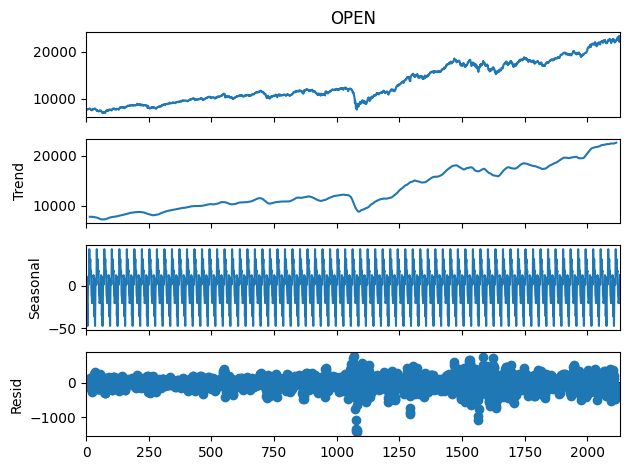

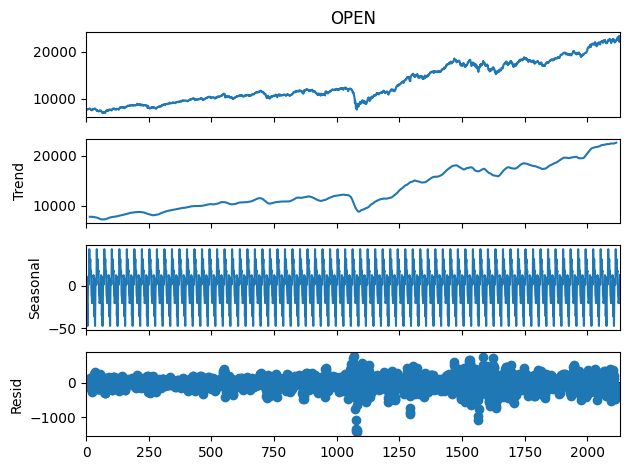

In [20]:
decompose = seasonal_decompose(data['OPEN'],model='additive',period=30)
decompose.plot()

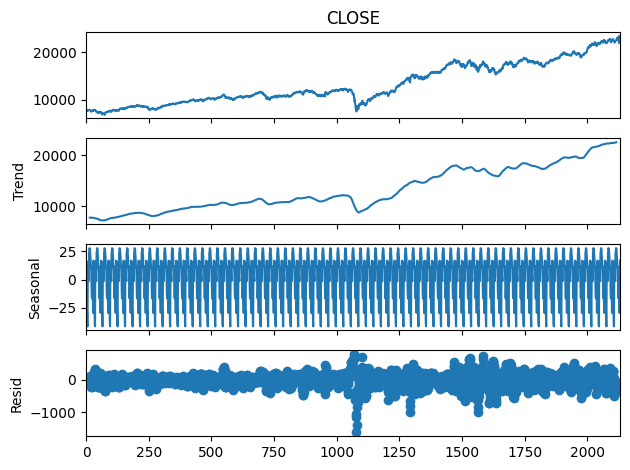

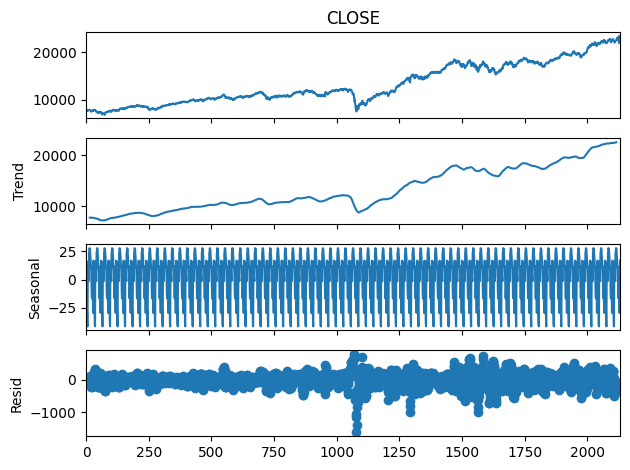

In [21]:
decompose = seasonal_decompose(data['CLOSE'],model='additive',period=30)
decompose.plot()

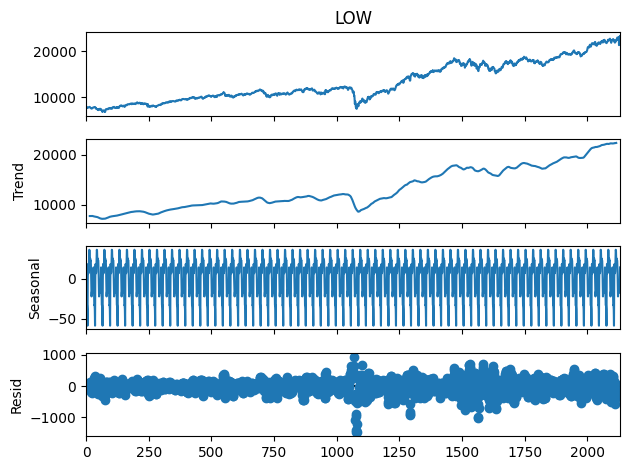

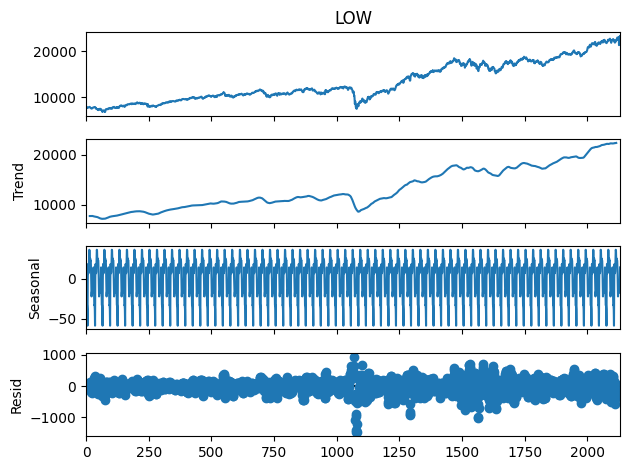

In [22]:
decompose = seasonal_decompose(data['LOW'],model='additive',period=30)
decompose.plot()

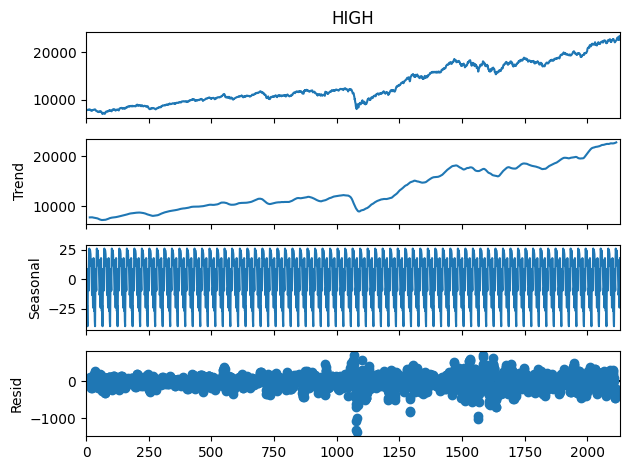

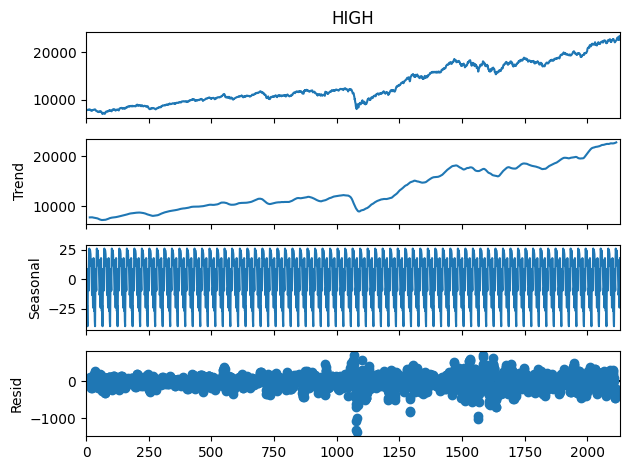

In [23]:
decompose = seasonal_decompose(data['HIGH'],model='additive',period=30)
decompose.plot()

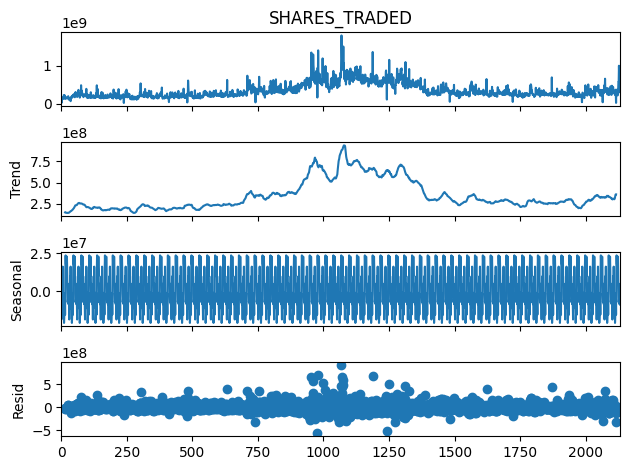

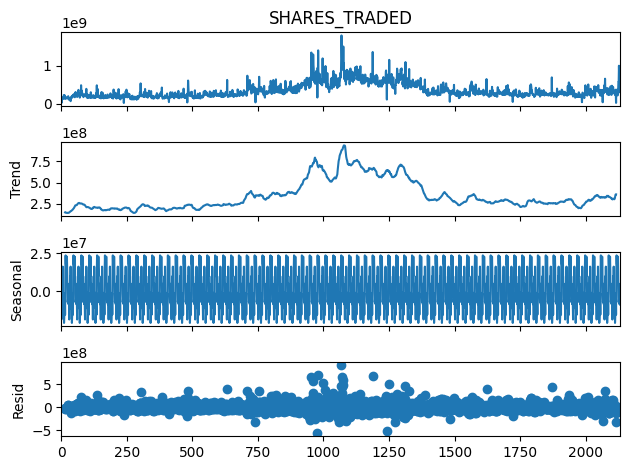

In [24]:
decompose = seasonal_decompose(data['SHARES_TRADED'],model='additive',period=30)
decompose.plot()

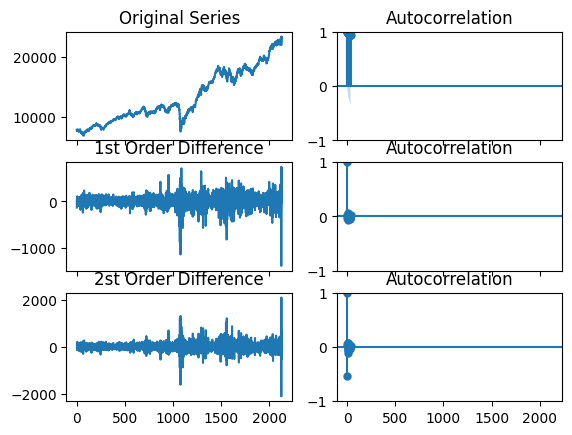

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,2,sharex=True)

# original series
axes[0,0].plot(data['CLOSE'])
axes[0,0].set_title('Original Series')
plot_acf(data['CLOSE'],ax=axes[0,1])

# 1st Difference
axes[1,0].plot(data['CLOSE'].diff())
axes[1,0].set_title('1st Order Difference')
plot_acf(data['CLOSE'].diff().dropna(),ax=axes[1,1])

# 2st Difference
axes[2,0].plot(data['CLOSE'].diff().diff())
axes[2,0].set_title('2st Order Difference')
plot_acf(data['CLOSE'].diff().diff().dropna(),ax=axes[2,1])
plt.show()

## d = 1 or 2 and Now lets find q value. q is nothing are numbers of logs that we are considering for auto regression. Here we consider only those logs that have 95% confidence in correlation or 5% error in correlation

In [26]:
from statsmodels.tsa.stattools import acf,pacf
x_acf = pd.DataFrame(acf(data["CLOSE"]))
print(x_acf)

           0
0   1.000000
1   0.997847
2   0.995699
3   0.993652
4   0.991677
5   0.989856
6   0.987625
7   0.985636
8   0.983648
9   0.981618
10  0.979542
11  0.977423
12  0.975333
13  0.973213
14  0.971205
15  0.969215
16  0.967194
17  0.965181
18  0.963141
19  0.961139
20  0.959134
21  0.957111
22  0.955107
23  0.953101
24  0.951051
25  0.949014
26  0.946919
27  0.944830
28  0.942683
29  0.940549
30  0.938398
31  0.936338
32  0.934270
33  0.932272


## q = 25
## Now lets find p value

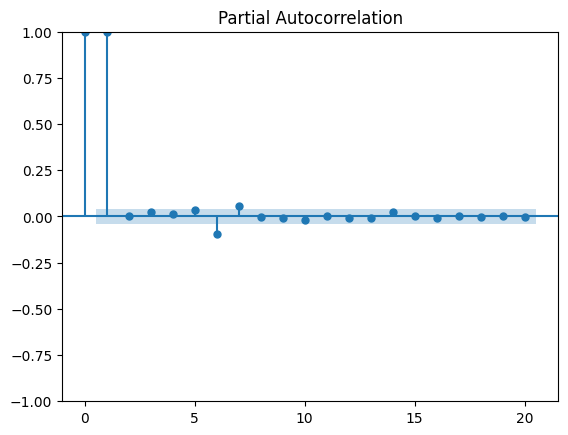

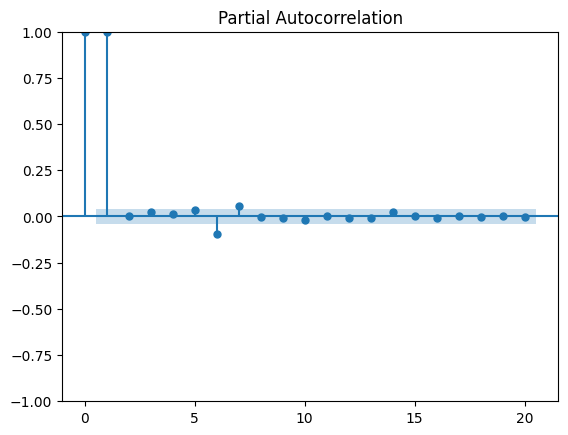

In [27]:
from statsmodels.tsa.stattools import acf,pacf
plot_pacf(data['CLOSE'],lags=20,alpha=0.05)

## p=2

In [28]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.8 MB/s eta 0:00:0000:0100:01


In [29]:
## lets use pmdarima

from pmdarima.arima import auto_arima
model = auto_arima(data['CLOSE'],start_p=1,start_q=1,max_p=2,max_q=5,start_P=0,seasonal=True,d=1,D=1,error_action='ignore',suppress_warnings=True)

In [30]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2131
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -13472.791
Date:                Sun, 16 Jun 2024   AIC                          26951.581
Time:                        03:12:12   BIC                          26968.573
Sample:                             0   HQIC                         26957.801
                               - 2131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.5230      3.064      2.455      0.014       1.518      13.528
ar.L1         -0.0357      0.012     -3.073      0.002      -0.058      -0.013
sigma2      1.826e+04    270.192     67.593      0.0

In [31]:
forcast = model.predict(n_periods=30)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [32]:
forcast

2131    23267.826971
2132    23275.042249
2133    23282.307881
2134    23289.571716
2135    23296.835616
2136    23304.099514
2137    23311.363412
2138    23318.627310
2139    23325.891207
2140    23333.155105
2141    23340.419003
2142    23347.682901
2143    23354.946798
2144    23362.210696
2145    23369.474594
2146    23376.738492
2147    23384.002389
2148    23391.266287
2149    23398.530185
2150    23405.794083
2151    23413.057980
2152    23420.321878
2153    23427.585776
2154    23434.849674
2155    23442.113571
2156    23449.377469
2157    23456.641367
2158    23463.905265
2159    23471.169162
2160    23478.433060
dtype: float64

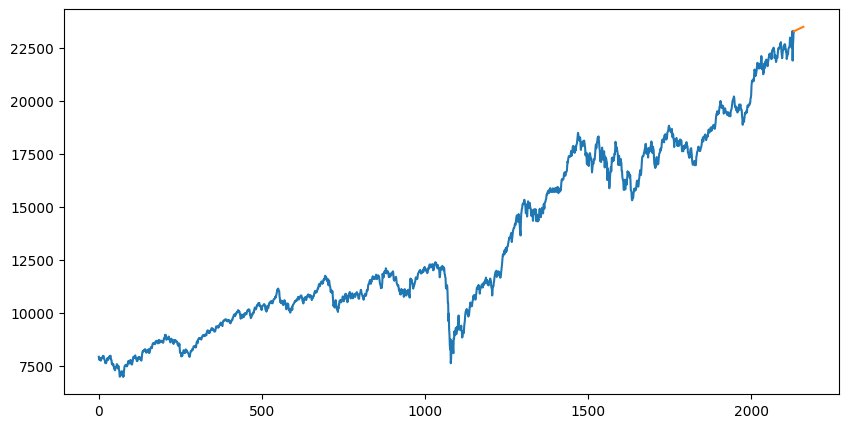

In [33]:
plt.figure(figsize=(10,5))
plt.plot(data['CLOSE'],label='Actual')
plt.plot(forcast,label='Forcast')

In [36]:
## lets run direct SARIMA
import statsmodels.api as sm
import warnings
p, d, q = 2, 1, 4

model_sarima = sm.tsa.statespace.SARIMAX(data['CLOSE'],order=(p,d,q), seasonal_order=(p,d,q,5))
model_sarima = model_sarima.fit()
print(model_sarima.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39595D+00    |proj g|=  1.83400D-02


 This problem is unconstrained.



At iterate    5    f=  6.38658D+00    |proj g|=  5.71043D-03

At iterate   10    f=  6.38574D+00    |proj g|=  4.76791D-03

At iterate   15    f=  6.37273D+00    |proj g|=  9.86747D-02

At iterate   20    f=  6.35359D+00    |proj g|=  1.69057D-01

At iterate   25    f=  6.33355D+00    |proj g|=  4.71506D-01

At iterate   30    f=  6.32629D+00    |proj g|=  1.72199D-01

At iterate   35    f=  6.31537D+00    |proj g|=  9.86541D-02

At iterate   40    f=  6.31432D+00    |proj g|=  2.89633D-02

At iterate   45    f=  6.31405D+00    |proj g|=  1.75541D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  6.31400D+00    |proj g|=  3.11605D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     92      1     0     0   3.116D-03   6.314D+00
  F =   6.3140020418742084     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                     
Dep. Variable:                             CLOSE   No. Observations:                 2131
Model:             SARIMAX(2, 1, 4)x(2, 1, 4, 5)   Log Likelihood              -13455.138
Date:                           Sun, 16 Jun 2024   AIC                          26936.277
T

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



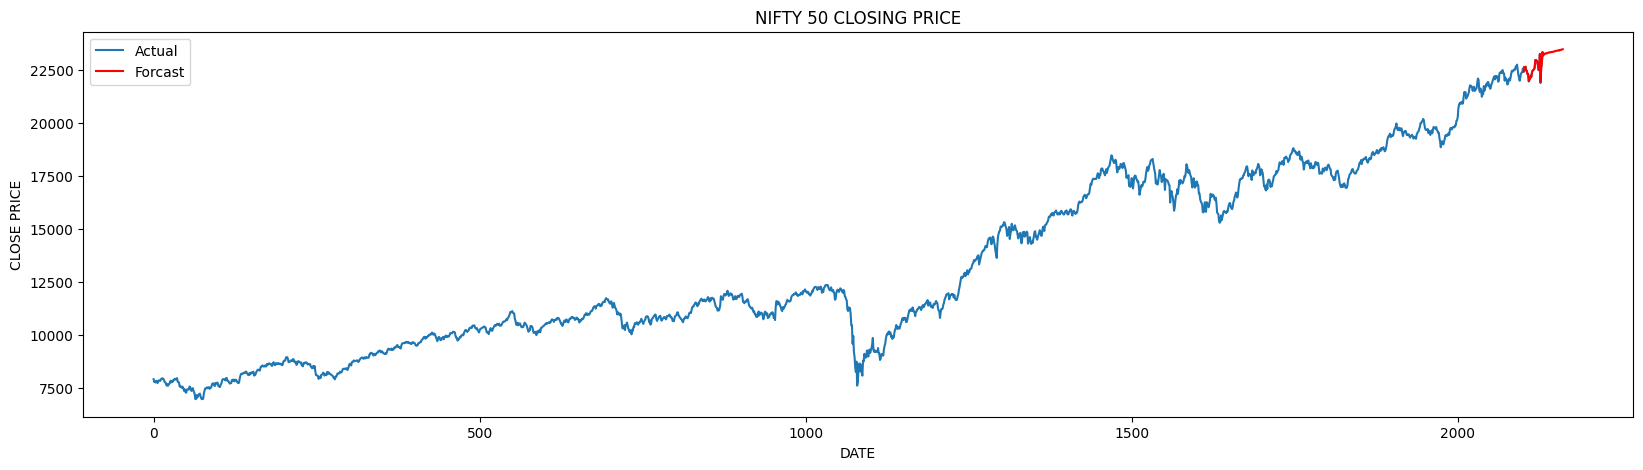

In [117]:
prediction = model_sarima.predict(start=len(data['CLOSE'])-30,end=len(data['CLOSE'])+30)
prediction = prediction[0:]
plt.figure(figsize=(20,5))
plt.plot(data['CLOSE'],label='Actual')
plt.plot(prediction,color ='red',label='Forcast')
plt.xlabel('DATE')
plt.ylabel('CLOSE PRICE')
plt.title("NIFTY 50 CLOSING PRICE")
plt.legend(loc='upper left')
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



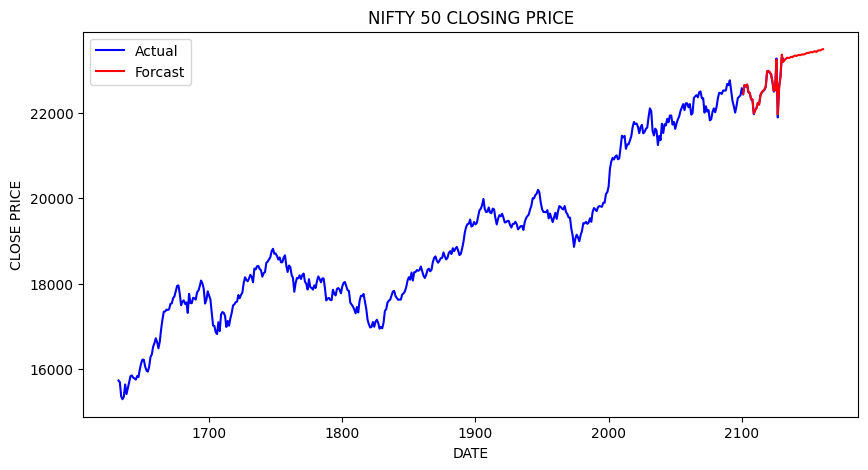

In [118]:
prediction = model_sarima.predict(start=len(data['CLOSE'])-30,end=len(data['CLOSE'])+30)
plt.figure(figsize=(10,5))
plt.plot(data['CLOSE'].tail(500),color ='blue',label='Actual')
plt.plot(prediction,color ='red',label='Forcast')
plt.xlabel('DATE')
plt.ylabel('CLOSE PRICE')
plt.title("NIFTY 50 CLOSING PRICE")
plt.legend(loc='upper left')
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



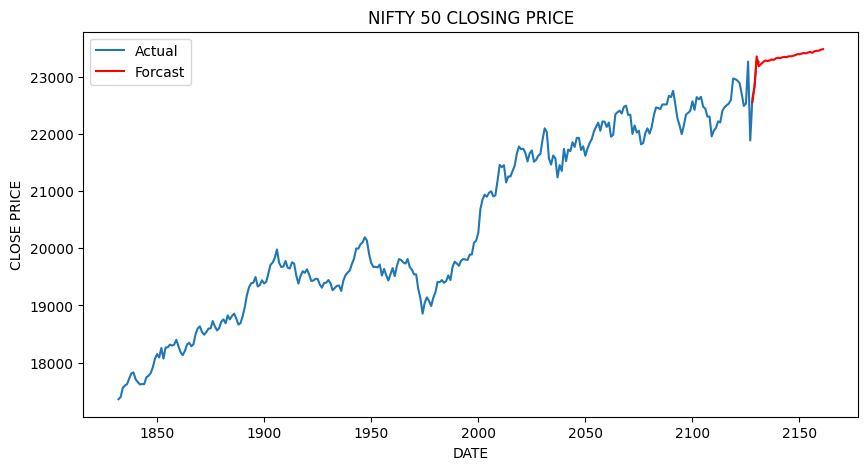

In [119]:
prediction = model_sarima.predict(len(data['CLOSE'])-3,len(data['CLOSE'])+30)
plt.figure(figsize=(10,5))
plt.plot(data['CLOSE'].tail(300),label='Actual')
plt.plot(prediction,color ='red',label='Forcast')
plt.xlabel('DATE')
plt.ylabel('CLOSE PRICE')
plt.title("NIFTY 50 CLOSING PRICE")
plt.legend(loc='upper left')
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



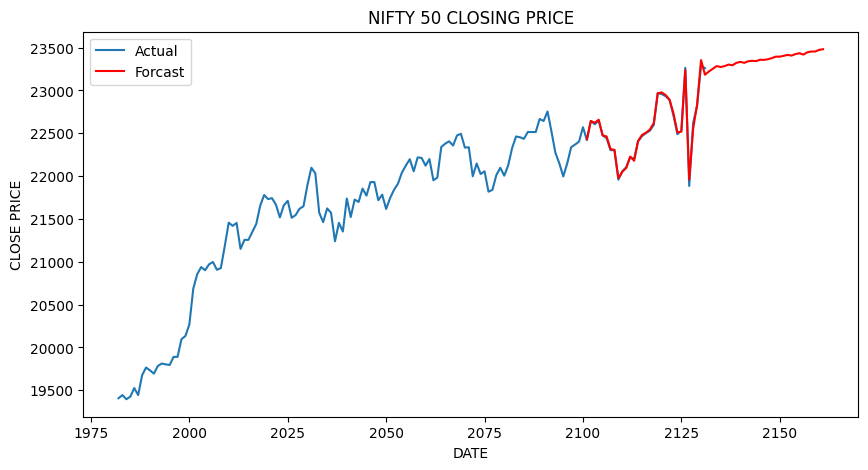

In [120]:
prediction = model_sarima.predict(len(data['CLOSE'])-30,len(data['CLOSE'])+30)
plt.figure(figsize=(10,5))
plt.plot(data['CLOSE'].tail(150),label='Actual')
plt.plot(prediction,color ='red',label='Forcast')
plt.xlabel('DATE')
plt.ylabel('CLOSE PRICE')
plt.title("NIFTY 50 CLOSING PRICE")
plt.legend(loc='upper left')
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



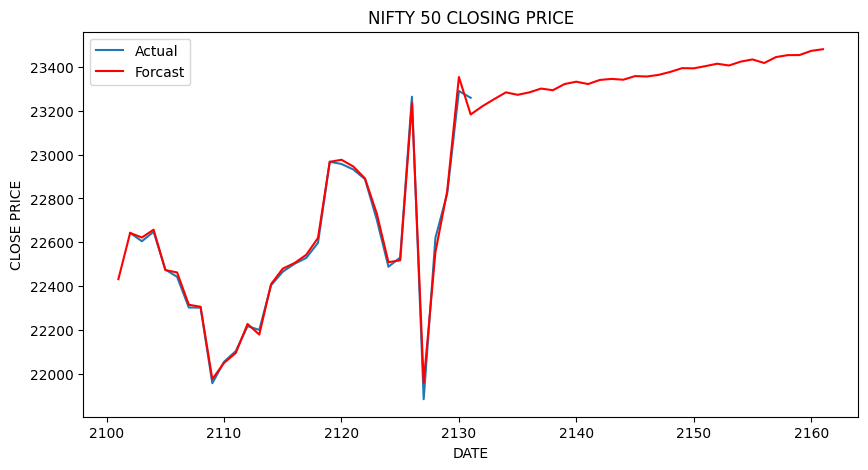

In [121]:
prediction = model_sarima.predict(len(data['CLOSE'])-30,len(data['CLOSE'])+30)
plt.figure(figsize=(10,5))
plt.plot(data['CLOSE'].tail(30),label='Actual')
plt.plot(prediction,color ='red',label='Forcast')
plt.xlabel('DATE')
plt.ylabel('CLOSE PRICE')
plt.title("NIFTY 50 CLOSING PRICE")
plt.legend(loc='upper left')
plt.show()